<a href="https://colab.research.google.com/github/UPstartDeveloper/DS-2.1-Machine-Learning/blob/master/Notebooks/Cereal_Ratings_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Suppose you have the following [dataset](https://docs.google.com/spreadsheets/d/1OyFwsZ77RnGiwSSkTPx6j9V9qyOqitysQij4WW4nhMU/edit#gid=1943041330)*, which is a list of 80 cereals, containing the following fields:

`mfr`: Manufacturer of cereal                   
- A = American Home Food Products
- G = General Mills
- K = Kelloggs                
- N = Nabisco               
- P = Post               
- Q = Quaker Oats              
- R = Ralston Purina  
         
`type`:              
- cold               
- hot 

`calories`: calories per serving      
`protein`: grams of protein per serving          
`fat`: grams of fat per serving           
`sodium`: milligrams of sodium           
`fiber`: grams of dietary fiber           
`carbs`: grams of complex carbohydrates           
`sugars`: grams of sugars           
`potass`: milligrams of potassium           
`vitamins`: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended            
`shelf`: display shelf (1, 2, or 3, counting from the floor)           
`weight`: weight in ounces of one serving           
`cups`: number of cups in one serving           
`rating`: a rating of the cereals (Possibly from Consumer Reports?)   
    
Given the above, can you build a model using Python to predict cereal rating? We'll be creating a multivariate linear regression as a solution for premium users.

# Scikit-Learn Solution

## Step 1: Imports

In [21]:
# Machine Learning
import sklearn
# Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Import Datasets via RESTful requests
# import requests
# import io

## Step 2: Get the Data

In [6]:
# you can use the address below to access the dataset from my GitHub repo
URL = "https://raw.githubusercontent.com/UPstartDeveloper/DS-1.1-Data-Analysis/master/Notebooks/Datasets/cereal.csv"
df = pd.read_csv(URL)
# verify it came through ok
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


## Step 3: Data Analysis


TODO: look for strong correlations between variables

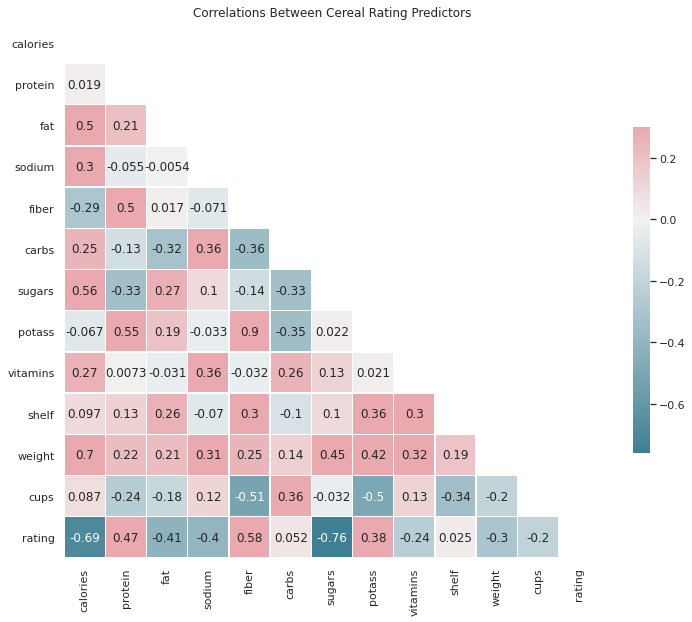

In [22]:
def make_heatmap(df, map_title):
    """Plots the diagonal correlation matrix of a dataset using Seaborn.

       Credit to the Seaborn Documentation for inspiring this cell:
       https://seaborn.pydata.org/examples/many_pairwise_correlations.html
       
       Args:
       df(pandas.DataFrame): encapsulates the dataset being used to make heatmap.
       map_title(str): the title for the heatmap
    
    """
    sns.set(style="white")
    # Compute the correlation matrix
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 12))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    plt.title(map_title)
    plt.show()

make_heatmap(df, "Correlations Between Cereal Rating Predictors")

Based on the heatmap above, I argue we ought to leave the following variables out of the model:
1. `weight`: because it appears to correlate positively with just about every other variable
2. `shelf`: this would be irrelevant to what rating a cereal gets in real life, based on how rarely I'd say you hear people talk about it in actual cereal reviews.
3. `cups`: similar reason to the `shelf` column, I'd argue this column is contextually irrelevant to the reason a cereal gets a certain rating and not another.

My intuition tells my the `type` column is only one value - let's verify!

In [7]:
cereal_types = df["type"]
print(f"The 'type' column has {cereal_types.nunique()} unique values.")

The 'type' column has 2 unique values.


Ok so I was wrong, let's take a look at the distribution of these values:

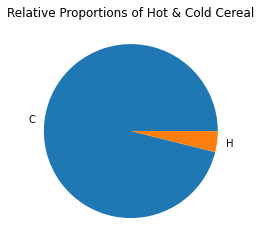

In [17]:
plt.pie(cereal_types.value_counts(), labels=cereal_types.unique())
plt.title("Relative Proportions of Hot & Cold Cereal")
plt.show()

So now we know the overwhelming majority of cereals in the dataset are cold.

Let's also see the relative proportions of the 4 manufacturers represented in the dataset:


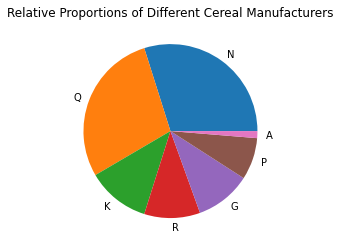

In [18]:
plt.pie(df["mfr"].value_counts(), labels=df["mfr"].unique())
plt.title("Relative Proportions of Different Cereal Manufacturers")
plt.show()

To be honest, I considered leaving this column out of the model because I personally don't think manufacturers should predict with cereal rating. However, since this industry usually doesn't get disrupted very often, I'll leave it in as it could be possible that name brand influences how cereals are rated.

## Step 4: Data Preprocessing
- optional: perform PCA
- drop columns
- standardize values 
- encode categorical variables (if they're being includeed)

In [ ]:
# Drop the unnecessary columns - shelf, cups, weight
# no PCA now - first normalize the columns using StandardScaler
# encode the categorical variables

## Step 5: Split the Data

## Step 6: Fit the Linear Regression Model on Training Data

## Step 7: Evaluate the Model on Validation Data
- TODO: do 5-fold cross validation